# Modeling and analysis of Formula 1 Finishing Positions
**Date:** 09-09-2025 

**Project Goal:**  
Analyse Formula 1 data to understand driver and car performance, and build a model to predict outcomes on finishing positions.

**Objectives:**
1. Inspect data to look at trends and patterns for drivers at certain tracks
2. Clean data to prepare for analysis
3. Analyse data and draw conclusions to provide an accurate prediction to lap times
4. Provide visual data in the form of graphs and tables 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Loading all the dataset
circuits = pd.read_csv('circuits.csv')
constructorStandings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driverStandings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')

# Data preprocessing

In [5]:
# Only selecting columns that will be needed 
circuits = circuits[['circuitId', 'circuitRef']]
constructorStandings = constructorStandings[['constructorId', 'raceId', 'points', 'position']]
constructors = constructors[['constructorId', 'name']]
driverStandings = driverStandings[['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'wins']]
drivers = drivers[['driverId', 'code', 'dob']]
qualifying = qualifying[['qualifyId', 'raceId', 'driverId', 'position']]
races = races[['raceId', 'year', 'circuitId', 'name']]
results = results[['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'position', 'points', 'statusId']]
status = status[['statusId', 'status']]

# Listing all the ids for drivers for this season 
allowed_driver_ids = [863, 860, 864, 865, 861, 862, 859, 857, 852, 846, 840, 847, 844, 830, 839, 848, 942, 832, 815, 822, 807, 1, 4]
drivers = drivers[drivers['driverId'].isin(allowed_driver_ids)].copy()


display(circuits.head())
display(constructorStandings.head())
display(driverStandings.head())
display(drivers.head())
display(constructors.head())
display(qualifying.head())
display(races.head())
display(results.head())
display(status.head())

,circuitId,circuitRef
0,1,albert_park
1,2,sepang
2,3,bahrain
3,4,catalunya
4,5,istanbul


,constructorId,raceId,points,position
0,1,18,14.0,1
1,2,18,8.0,3
2,3,18,9.0,2
3,4,18,5.0,4
4,5,18,2.0,5


,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0


,driverId,code,dob
0,1,HAM,1985-01-07
3,4,ALO,1981-07-29
807,807,HUL,1987-08-19
814,815,PER,1990-01-26
821,822,BOT,1989-08-28


,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


,qualifyId,raceId,driverId,position
0,1,18,1,1
1,2,18,9,2
2,3,18,5,3
3,4,18,13,4
4,5,18,2,5


,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


,resultId,raceId,driverId,constructorId,grid,position,points,statusId
0,1,18,1,1,1,1,10.0,1
1,2,18,2,2,5,2,8.0,1
2,3,18,3,3,7,3,6.0,1
3,4,18,4,4,11,4,5.0,1
4,5,18,5,1,3,5,4.0,1


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [6]:
# Merging the tables 
f1_data = results.merge(drivers, on="driverId", how="left")
f1_data = f1_data.merge(constructors, on="constructorId", how="left")
f1_data = f1_data.merge(status, on="statusId", how="left")
f1_data = f1_data.merge(races, on="raceId", how="left")
f1_data = f1_data.merge(circuits, on="circuitId", how="left")
f1_data = f1_data.merge(driverStandings, on=["raceId", "driverId"], how="left", suffixes=("", "_driverStandings"))
f1_data = f1_data.merge(constructorStandings, on=["raceId", "constructorId"], how="left", suffixes=("", "_constructorStandings"))
f1_data = f1_data.merge(qualifying, on=["raceId", "driverId"], how="left", suffixes=("", "_qualifying"))

f1_data.head()

,resultId,raceId,driverId,constructorId,grid,position,points,statusId,code,dob,...,name_y,circuitRef,driverStandingsId,points_driverStandings,position_driverStandings,wins,points_constructorStandings,position_constructorStandings,qualifyId,position_qualifying
0,1,18,1,1,1,1,10.0,1,HAM,1985-01-07,...,Australian Grand Prix,albert_park,1.0,10.0,1,1.0,14.0,1.0,1.0,1.0
1,2,18,2,2,5,2,8.0,1,NaN,NaN,...,Australian Grand Prix,albert_park,2.0,8.0,2,0.0,8.0,3.0,5.0,5.0
2,3,18,3,3,7,3,6.0,1,NaN,NaN,...,Australian Grand Prix,albert_park,3.0,6.0,3,0.0,9.0,2.0,7.0,7.0
3,4,18,4,4,11,4,5.0,1,ALO,1981-07-29,...,Australian Grand Prix,albert_park,4.0,5.0,4,0.0,5.0,4.0,12.0,12.0
4,5,18,5,1,3,5,4.0,1,NaN,NaN,...,Australian Grand Prix,albert_park,5.0,4.0,5,0.0,14.0,1.0,3.0,3.0


In [7]:
print(drivers[['driverId', 'code', 'dob']])

     driverId code         dob
0           1  HAM  1985-01-07
3           4  ALO  1981-07-29
807       807  HUL  1987-08-19
814       815  PER  1990-01-26
821       822  BOT  1989-08-28
829       830  VER  1997-09-30
831       832  SAI  1994-09-01
838       839  OCO  1996-09-17
839       840  STR  1998-10-29
842       844  LEC  1997-10-16
844       846  NOR  1999-11-13
845       847  RUS  1998-02-15
846       848  ALB  1996-03-23
850       852  TSU  2000-05-11
855       857  PIA  2001-04-06
857       859  LAW  2002-02-11
858       860  BEA  2005-05-08
859       861  COL  2003-05-27
860       862  DOO  2003-01-20
861       863  ANT  2006-08-25
862       864  BOR  2004-10-14
863       865  HAD  2004-09-28


In [8]:
# Filtering data so it only includes from 2015
f1_data = f1_data[f1_data['year'] >= 2015]

In [9]:
# Checking the shape of the dataset 
# (Number of rows, number of columns)
f1_data.shape

(4538, 24)

In [10]:
# Column names, Non-null count and data types
# Look for columns that need type conversion e.g. date, or if any columns look wrong (a numeric column showing up as object).
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 22534 to 27077
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resultId                       4538 non-null   int64  
 1   raceId                         4538 non-null   int64  
 2   driverId                       4538 non-null   int64  
 3   constructorId                  4538 non-null   int64  
 4   grid                           4538 non-null   int64  
 5   position                       4538 non-null   object 
 6   points                         4538 non-null   float64
 7   statusId                       4538 non-null   int64  
 8   code                           2659 non-null   object 
 9   dob                            2659 non-null   object 
 10  name_x                         4538 non-null   object 
 11  status                         4538 non-null   object 
 12  year                           4538 non-null   i

The dataset has the column nationality_encoded. As this is not important for predictions this column has been dropped.

In [12]:
# Flagging null values in position variable
f1_data["position"] = f1_data["position"].replace("\\N", np.nan)

# Dropping all null values 
f1_data = f1_data.dropna()

# Changing position to integer
f1_data["position"] = f1_data["position"].astype(int)

In [13]:
# Number of unique values per column
f1_data.nunique()

resultId                         2334
raceId                            225
driverId                           22
constructorId                      17
grid                               23
position                           21
points                             23
statusId                           30
code                               22
dob                                22
name_x                             17
status                             30
year                               11
circuitId                          32
name_y                             38
circuitRef                         32
driverStandingsId                2334
points_driverStandings            365
position_driverStandings           25
wins                               20
points_constructorStandings       448
position_constructorStandings      11
qualifyId                        2334
position_qualifying                22
dtype: int64

In [14]:
# Final display of data table 
f1_data.describe()

,resultId,raceId,driverId,constructorId,grid,position,points,statusId,year,circuitId,driverStandingsId,points_driverStandings,wins,points_constructorStandings,position_constructorStandings,qualifyId,position_qualifying
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000
mean,25254.790917,1065.772922,706.072408,69.572836,8.671380,8.056127,7.421380,4.621251,2021.049700,28.802913,70885.871037,75.956512,0.819623,149.730506,4.608398,9029.757069,8.823907
std,1270.732544,66.243966,302.423017,81.423320,5.556203,5.007138,7.878044,10.866631,3.018747,27.060879,1936.129710,90.334942,2.136879,172.242596,2.738501,1281.581612,5.484679
min,22538.000000,926.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2015.000000,1.000000,67058.000000,0.000000,0.000000,0.000000,1.000000,6309.000000,1.000000
25%,24264.500000,1013.000000,815.000000,5.000000,4.000000,4.000000,0.000000,1.000000,2019.000000,9.000000,69289.250000,11.000000,0.000000,23.000000,2.000000,8019.500000,4.000000
50%,25429.500000,1075.000000,832.000000,10.000000,8.000000,7.000000,6.000000,1.000000,2022.000000,17.000000,71301.500000,40.000000,0.000000,76.500000,4.000000,9216.500000,8.000000
75%,26367.750000,1125.000000,846.000000,131.000000,13.000000,12.000000,12.000000,11.000000,2024.000000,39.000000,72685.750000,111.000000,0.000000,225.500000,7.000000,10154.750000,13.000000
max,27083.000000,1160.000000,865.000000,215.000000,22.000000,21.000000,26.000000,140.000000,2025.000000,80.000000,73599.000000,575.000000,19.000000,860.000000,11.000000,10871.000000,22.000000


In [15]:
f1_data.head()

,resultId,raceId,driverId,constructorId,grid,position,points,statusId,code,dob,...,name_y,circuitRef,driverStandingsId,points_driverStandings,position_driverStandings,wins,points_constructorStandings,position_constructorStandings,qualifyId,position_qualifying
22534,22538,926,1,131,1,1,25.0,1,HAM,1985-01-07,...,Australian Grand Prix,albert_park,67184.0,25.0,1,1.0,43.0,1.0,6309.0,1.0
22540,22544,926,807,10,13,7,6.0,11,HUL,1987-08-19,...,Australian Grand Prix,albert_park,67190.0,6.0,7,0.0,7.0,6.0,6322.0,14.0
22542,22546,926,832,5,7,9,2.0,11,SAI,1994-09-01,...,Australian Grand Prix,albert_park,67192.0,2.0,9,0.0,2.0,7.0,6316.0,8.0
22543,22547,926,815,10,14,10,1.0,11,PER,1990-01-26,...,Australian Grand Prix,albert_park,67193.0,1.0,10,0.0,7.0,6.0,6323.0,15.0
22553,22557,927,1,131,1,2,18.0,1,HAM,1985-01-07,...,Malaysian Grand Prix,sepang,67058.0,43.0,1,1.0,76.0,1.0,6327.0,1.0


## Exploratory Data Analysis
In this section I will be analysing the data to find the relationship or trends between the features and the target variable, which is the predicted finishing position. This includes examining distributions, comparing driver and constructor performance, and assessing how factors like grid position and race conditions influence results.

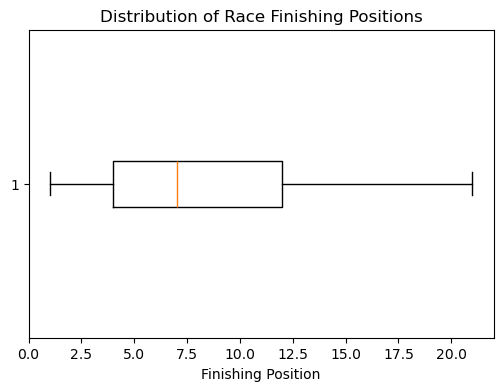

In [17]:
# Distribution of finishing positions 
# Verifying that the finishing position data is consistent, evenly distributed, and free from anomalies

# Need to filter above 22 because there are some drivers in a season which are not included (as have not raced yet)
f1_data = f1_data[(f1_data['position'] <= 22)]

plt.figure(figsize=(6,4))
plt.boxplot(f1_data['position'], vert=False)
plt.title("Distribution of Race Finishing Positions")
plt.xlabel("Finishing Position")
plt.show()

### Number of pit stops and finishing position

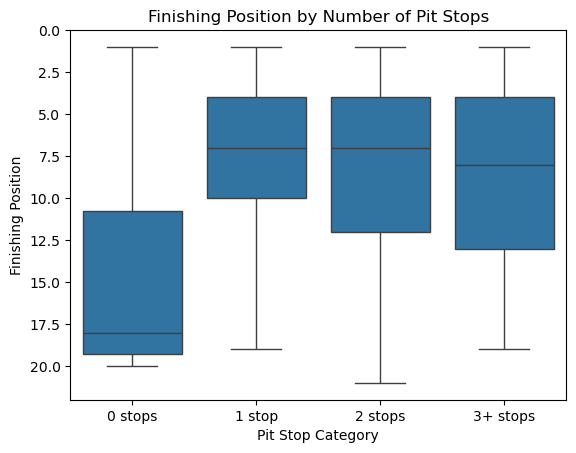

In [19]:
pit_stops = pd.read_csv("pit_stops.csv")
pit_count = pit_stops.groupby(['raceId', 'driverId']).size().reset_index(name='pit_count')

# merging pit stop counts into results
f1_data = f1_data.merge(pit_count, on=['raceId','driverId'], how='left')

f1_data['pit_count'] = f1_data['pit_count'].fillna(0)

f1_data["pit_group"] = pd.cut(
    f1_data["pit_count"],
    bins=[-1, 0, 1, 2, 10],
    labels=["0 stops", "1 stop", "2 stops", "3+ stops"]
)

sb.boxplot(
    x="pit_group",
    y="position",
    data=f1_data,
    showfliers=False
)

plt.title("Finishing Position by Number of Pit Stops")
plt.xlabel("Pit Stop Category")
plt.ylabel("Finishing Position")
plt.gca().invert_yaxis()  
plt.show()

The boxplot shows finishing positions compared to number of pit stops. The error bars of all age groups overlap, suggesting that there is no significant difference between the two factors. This suggests that other factors (like team or grid position) are likely more important for predicting race performance.

### Grid position and race result 

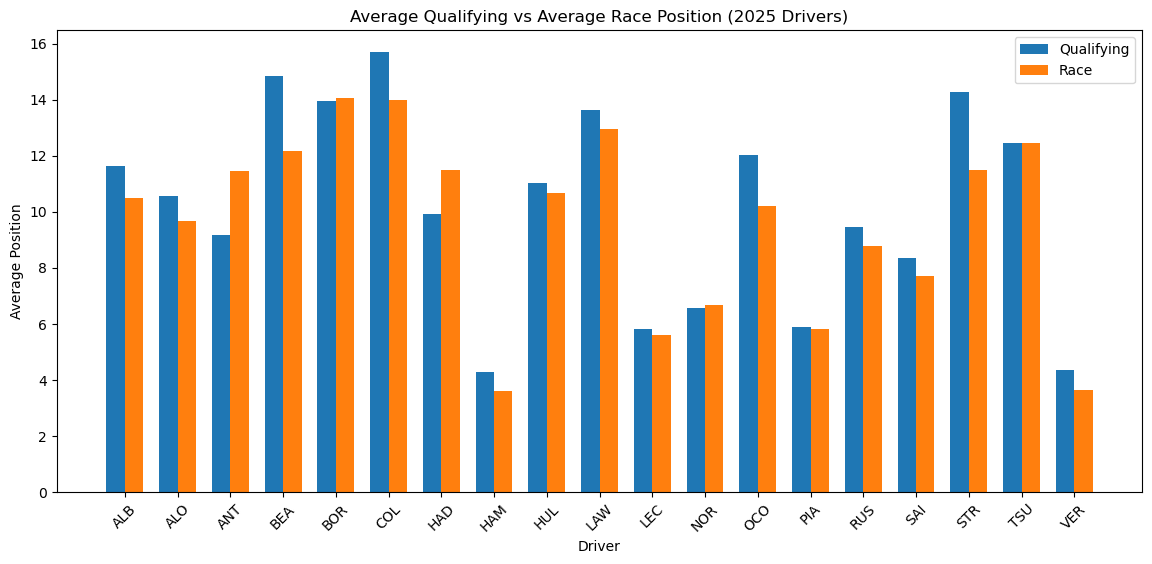

In [22]:
drivers2025 = ["VER", "TSU", "LEC", "HAM", "NOR", "PIA", "RUS", "ANT", "ALO", "STR", "GAS", "COL", "OCO", "BEA", "LAW", "HAD", "HUL", "BOR", "ALB", "SAI"]

f1_2025 = f1_data[f1_data['code'].isin(drivers2025)]

driverAvg = f1_2025.groupby('code')[['position_qualifying', 'position']].mean().reset_index()

# x position for the bars 
x = np.arange(len(driverAvg))  
width = 0.35

# Plotting
plt.figure(figsize=(14,6))
plt.bar(x - width/2, driverAvg['position_qualifying'], width=width, label='Qualifying')
plt.bar(x + width/2, driverAvg['position'], width=width, label='Race')

# Label to display on the x axis 
plt.xticks(x, driverAvg['code'], rotation=45)

# axis labels 
plt.ylabel("Average Position")
plt.xlabel("Driver")
plt.title("Average Qualifying vs Average Race Position (2025 Drivers)")
plt.legend()
plt.show()

From this bar chart we can identify drivers who frequently improve and lose positions during a race.
-> Can highlight drivers/teams that are strong in qualifying but weak in races, or vice versa.

### Number of DNF's and tracks

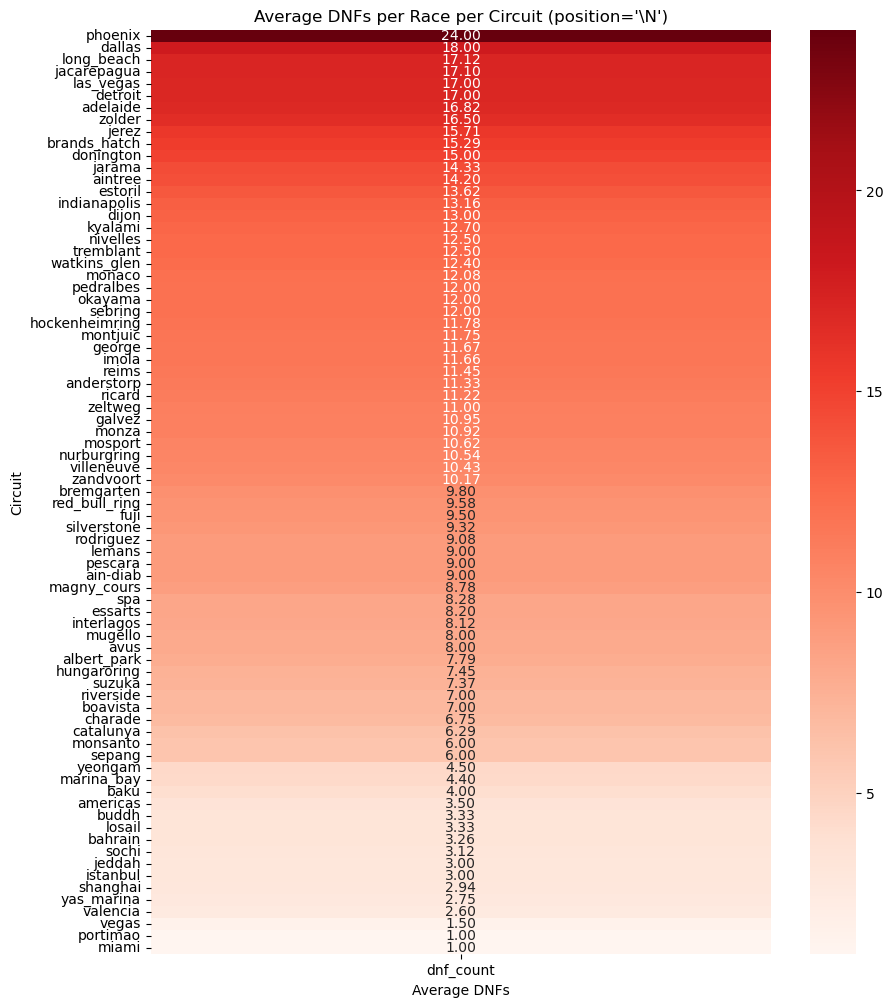

In [25]:
results['position'] = results['position'].astype(str).str.strip()
results['DNF'] = results['position'] == '\\N'

# Count DNFs per race
dnfsPerRace = results.groupby('raceId')['DNF'].sum().reset_index(name='dnf_count')

# Merging with race info
dnfsPerRace = dnfsPerRace.merge(races[['raceId','year','circuitId']], on='raceId', how='left')
dnfsPerRace = dnfsPerRace.merge(circuits[['circuitId','circuitRef']], on='circuitId', how='left')

# Calculating average DNFs per circuit per year
avgDnfPerCircuitYear = dnfsPerRace.groupby(['circuitRef','year'])['dnf_count'].mean().reset_index()

# Calculating overall average DNFs per circuit across years
avgDnfPerCircuit = avgDnfPerCircuitYear.groupby('circuitRef')['dnf_count'].mean().reset_index()
avgDnfPerCircuit = avgDnfPerCircuit.sort_values('dnf_count', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 12))
sb.heatmap(
    avgDnfPerCircuit[['dnf_count']],
    annot=avgDnfPerCircuit['dnf_count'].values.reshape(-1,1).round(2),
    fmt=".2f",
    cmap="Reds",
    cbar=True,
    yticklabels=avgDnfPerCircuit['circuitRef']
)

plt.title("Average DNFs per Race per Circuit (position='\\N')")
plt.xlabel("Average DNFs")
plt.ylabel("Circuit")
plt.show()

## Target and independent variables 
In this section, I define the target variable for prediction and identify the independent variables that will be used as inputs for the model.

### Target variable
finish_category: A new variable I will make which categorises race outcomes into podium, points, no points and DNF 

### Independent variables
These will be the inputs that will be used to predict the target variable: grid, driverId, constructorId, driver_age, position_previous_race...

## Preparing features for future race predictions 


In [29]:
# Ensure finish positions are numeric
f1_data['finish_position'] = pd.to_numeric(f1_data['position'], errors='coerce')

# Compute average finish in last 5 races (only using past races)
avgFinish = f1_data.groupby('driverId')['finish_position'] \
                    .apply(lambda x: x.shift(1).rolling(5, min_periods=1).mean())

# Align index with original DataFrame
f1_data['avg_finish_last5'] = avgFinish.reset_index(level=0, drop=True)

# Fill NaN in avg_finish_last5 with 20 for new drivers
f1_data['avg_finish_last5'] = f1_data['avg_finish_last5'].fillna(20)

# Define target variable
f1_data['finish_category'] = f1_data['finish_position'].apply(
    lambda x: 'podium' if x <= 3 else 'points' if x <= 10 else 'no_points'
)

# Defining x and y variables 
# X can only have variables which are numeric
numericCols = [
    'raceId',
    'driverId',
    'constructorId',
    'grid',
    'statusId',
    'points',
    'pit_count',
    'avg_finish_last5'
]

X = f1_data[numericCols] 
y = f1_data['finish_category']

## Modelling

I will split the full dataset into train, test and validation sets. I will then evaluate the accurary of the various models, tuing parameters where necessary.

I will choose Logistic Regression as my model because the target variable is categorical and consists of multiple classes.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

   no_points       0.90      1.00      0.95       131
      podium       1.00      1.00      1.00       122
      points       1.00      0.93      0.96       214

    accuracy                           0.97       467
   macro avg       0.97      0.98      0.97       467
weighted avg       0.97      0.97      0.97       467

Accuracy: 0.9678800856531049


In [52]:
# User input for driver code 
driverCode = input("Enter driver code (e.g., 'SAI'): ").upper()

# Find driverId
driverRow = drivers.loc[drivers['code'] == driverCode]
if driverRow.empty:
    print("Driver not found!")
else:
    # Retrieving driver id
    driverId = int(driverRow['driverId'].values[0])

    # Number of upcoming races 
    nRaces = int(input("How many upcoming races? "))

    # Lists for user entries
    raceIds = []
    constructorIds = []
    grids = []
    statuses = []
    pointsList = []
    pitCounts = []

    for i in range(nRaces):
        print(f"Race {i+1}")

        raceId = int(input("Race ID: "))
        constructorId = int(input("Constructor ID: "))
        grid = int(input("Grid position: "))
        # Status 1 is the only one which means the driver has completed the race
        status = 1  
        
        points = int(input("Driver points before this race: "))
        pits = int(input("Expected number of pit stops: "))
        
        # Save values
        raceIds.append(raceId)
        constructorIds.append(constructorId)
        grids.append(grid)
        statuses.append(status)
        pointsList.append(points)
        pitCounts.append(pits)

        standRow = driverStandings[(driverStandings['driverId'] == driverId) & (driverStandings['raceId'] == raceId)]

        if standRow.empty:
            dsId = 0  
        else:
            dsId = int(standRow['driverStandingsId'].values[0])

    # Get historical data for this driver
    driverHistory = f1_data[f1_data['driverId'] == driverId].sort_values('raceId')

    # Compute the average 5 positions for this driver
    if driverHistory.empty:
        # Set to 20 if no past races 
        avgFinishVal = 20  
    else:
        avgFinishVal = driverHistory['position'].tail(5).mean()
    
    # Replicate for upcoming races
    avgFinishLast5 = [avgFinishVal] * nRaces

    input_df = pd.DataFrame({
    "raceId": raceIds,
    "driverId": [driverId] * nRaces,
    "constructorId": constructorIds,
    "grid": grids,
    "statusId": statuses,
    "points": pointsList,
    "pit_count": pitCounts,
    "avg_finish_last5": avgFinishLast5
})

    # Scaling
    inputScaled = scaler.transform(input_df)

    # Predicting
    predictions = log_reg.predict(inputScaled)

    print("Predictions:")
    for i, pred in enumerate(predictions, start=1):
        print(f"Predicted finishing category for race {i}: {pred}")

Enter driver code (e.g., 'SAI'):  SAI
How many upcoming races?  2


Race 1


Race ID:  4
Constructor ID:  4
Grid position:  10
Driver points before this race:  8
Expected number of pit stops:  2


Race 2


Race ID:  5
Constructor ID:  4
Grid position:  16
Driver points before this race:  8
Expected number of pit stops:  2


Predictions:
Predicted finishing category for race 1: points
Predicted finishing category for race 2: points
